# Enfermedades al corazòn

In [ ]:
# Primero importar libreria pandas

In [1]:
import pandas as pd

In [14]:
# luego importar los datos
data = pd.read_csv('phpgNaXZe.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,2,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [15]:
# Eliminar la fila de id
data = data.drop('id',axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [16]:
# Crearemos el nombre de cada columnas (están en la pagina donde se descargo el data set,
# pero yo los copie desde el video de youtube). 
columnas = ['sbp','tabaco','ldl','adiposity','familia','tipo','obesidad','alcohol','edad','chd']

In [17]:
# Ahora cambiaremos el nombre de las columnas
data.columns = columnas
data.head()

,sbp,tabaco,ldl,adiposity,familia,tipo,obesidad,alcohol,edad,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [18]:
# Analizar los datos (qué tipo son)
data.dtypes

sbp            int64
tabaco       float64
ldl          float64
adiposity    float64
familia        int64
tipo           int64
obesidad     float64
alcohol      float64
edad           int64
chd            int64
dtype: object

In [19]:
# verificar si hay datos nulos
data.isnull().sum()

sbp          0
tabaco       0
ldl          0
adiposity    0
familia      0
tipo         0
obesidad     0
alcohol      0
edad         0
chd          0
dtype: int64

In [21]:
# Al obserbar los datos, podemos notar que sbp tiene los datos con una cariación mayor a la de las demas columnas
# Tambien en familia y chd, notamos que los datos son 1 y 2, en vez de 0 y 1.
# Así que realizarmos ajustes para optimizar el modelo.
# Cambiar datos de familia y chd importando:
from sklearn.preprocessing import LabelEncoder

In [23]:
encoder = LabelEncoder()
data['familia']=encoder.fit_transform(data['familia'])
data['chd']=encoder.fit_transform(data['chd'])
data.head()

,sbp,tabaco,ldl,adiposity,familia,tipo,obesidad,alcohol,edad,chd
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [24]:
# cambiar los datos de sbp importando:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scale = MinMaxScaler(feature_range = (0,100))

In [29]:
data['sbp'] = scale.fit_transform(data['sbp'].values.reshape(-1,1))

In [30]:
data.head()

,sbp,tabaco,ldl,adiposity,familia,tipo,obesidad,alcohol,edad,chd
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [31]:
# Ahora visualizaremos algunos gráficos

<AxesSubplot:xlabel='edad', ylabel='obesidad'>

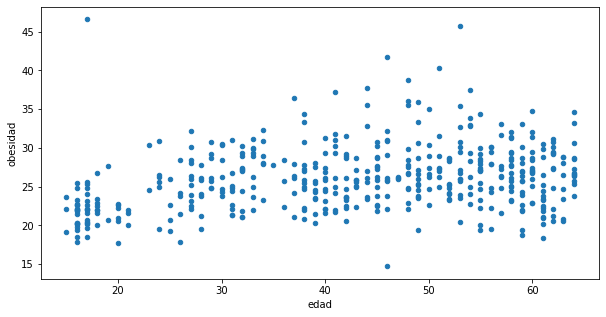

In [32]:
# Obesidad vs edad
data.plot(x='edad', y='obesidad', kind = 'scatter', figsize = (10,5))

<AxesSubplot:xlabel='edad', ylabel='tabaco'>

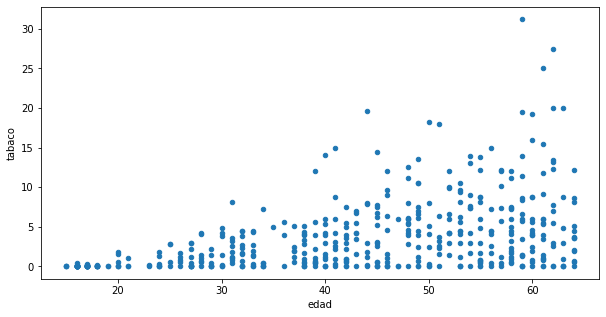

In [33]:
# Obesidad vs edad
data.plot(x='edad', y='tabaco', kind = 'scatter', figsize = (10,5))

<AxesSubplot:xlabel='edad', ylabel='alcohol'>

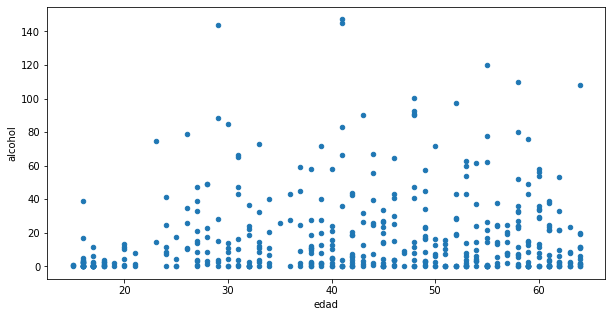

In [34]:
# Obesidad vs edad
data.plot(x='edad', y='alcohol', kind = 'scatter', figsize = (10,5))

# Ahora vamos al modelo

In [49]:
# Importamos para nuetsro analisis de machine learning
from sklearn.model_selection import train_test_split #separa datos de entrenamiento y prueba
from sklearn import svm #algoritmo a utilizar (maquinas de vectores de soporte, porque es un problema de clasificacion, porque queremos predecir, si existe alguna enfermedad al corazon o no)
from sklearn.metrics import confusion_matrix #funcion para evaluar el modelo que obtengamos
from sklearn.metrics import accuracy_score, precision_score #funcion para evaluar el modelo que obtengamos
from sklearn.metrics import recall_score #función sensibilidad entre positivos
from sklearn.metrics import f1_score #medida armonica de la memoria y la precision, con una puntuacion más alta como mejor modelo

In [38]:
 # Definir variables dependientes e independientes
y = data['chd']
X = data.drop('chd',axis=1)

In [39]:
# Separar los datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=1)

In [40]:
# Definir el algoritmo
algoritmo = svm.SVC(kernel = 'linear')

In [41]:
# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

SVC(kernel='linear')

In [42]:
# realizar una predicción
y_test_pred = algoritmo.predict(X_test)

In [43]:
# Se calcula la matriz de confusión
print(confusion_matrix(y_test,y_test_pred))

[[57  9]
 [17 10]]


In [44]:
# En la diagonal principal tenemos 67 datos correctos (57+10)
# En la diagonal secundaria tenemos 26 datos incorrectos (9+17)

In [50]:
# Calculamos exactitud (relación predic correctas / total predic) y precisión (relación entre las pred correctas y el total de pred correctas previstas) del modelo
accuracy_score(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred), f1_score(y_test, y_test_pred)

(0.7204301075268817,
 0.5263157894736842,
 0.37037037037037035,
 0.43478260869565216)